## **Keras On MNIST**

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [66]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from prettytable import PrettyTable

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [9]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [11]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [12]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [13]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [14]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [15]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [16]:
# here we are having a class number for each image
print("Class label of third image :", y_train[2])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[2])

Class label of third image : 4
After converting the output into a vector :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# 2 Layered Architecture

### Relu + Adam 

In [17]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [18]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 30

In [25]:
# start building a model
model_relu_2 = Sequential()
model_relu_2.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_relu_2.add(Dense(212, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.097, seed=None)) )
model_relu_2.add(Dense(output_dim, activation='softmax'))

print(model_relu_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 364)               285740    
_________________________________________________________________
dense_11 (Dense)             (None, 212)               77380     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2130      
Total params: 365,250
Trainable params: 365,250
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model_relu_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.2389 - acc: 0.9287 - val_loss: 0.1275 - val_acc: 0.9625
Epoch 2/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.0899 - acc: 0.9726 - val_loss: 0.0824 - val_acc: 0.9746
Epoch 3/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.0589 - acc: 0.9822 - val_loss: 0.0706 - val_acc: 0.9772
Epoch 4/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0386 - acc: 0.9880 - val_loss: 0.0718 - val_acc: 0.9787
Epoch 5/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.0286 - acc: 0.9908 - val_loss: 0.0853 - val_acc: 0.9759
Epoch 6/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0224 - acc: 0.9929 - val_loss: 0.0732 - val_acc: 0.9787
Epoch 7/30
60000/60000 [==============================] - 5s 90us/step - loss: 0.0166 - acc: 0.9950 - val_loss: 0.0829 - val_ac

Test score: 0.09564156731741441
Test accuracy: 0.9817


<IPython.core.display.Javascript object>


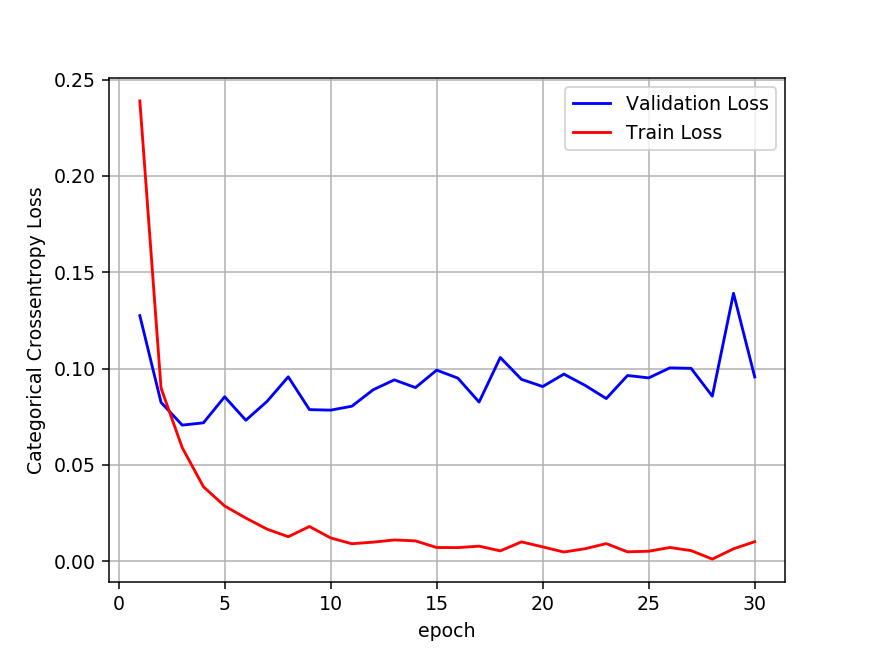

In [28]:
score_relu_2 = model_relu_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_2[0]) 
print('Test accuracy:', score_relu_2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


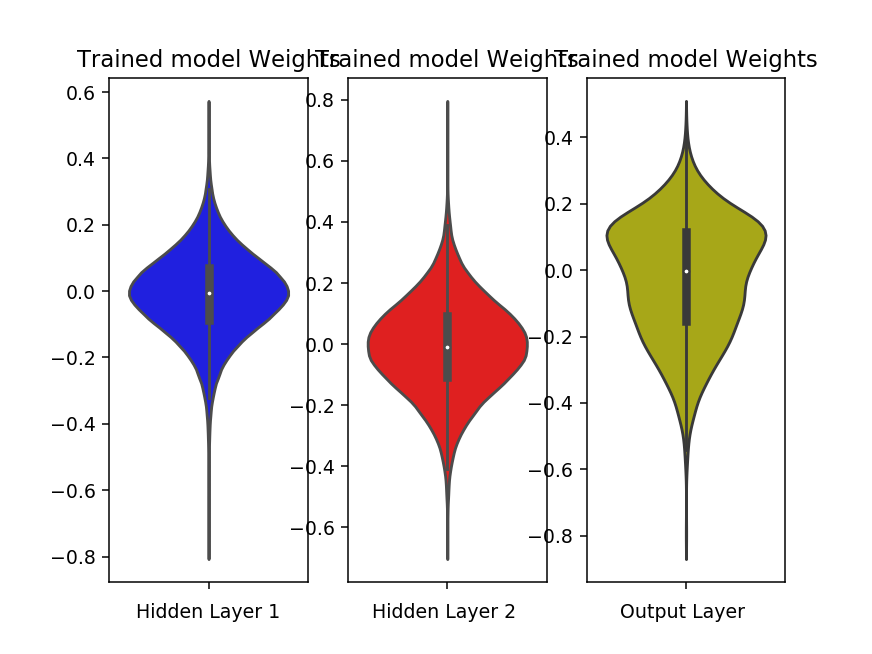

In [29]:
w_after = model_relu_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Batch normalization on hidden layers + Relu + Adam 

In [30]:
model_batch_2 = Sequential()

model_batch_2.add(Dense(532, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.061, seed=None)))
model_batch_2.add(BatchNormalization())

model_batch_2.add(Dense(384, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)) )
model_batch_2.add(BatchNormalization())

model_batch_2.add(Dense(output_dim, activation='softmax'))


model_batch_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 532)               417620    
_________________________________________________________________
batch_normalization_7 (Batch (None, 532)               2128      
_________________________________________________________________
dense_14 (Dense)             (None, 384)               204672    
_________________________________________________________________
batch_normalization_8 (Batch (None, 384)               1536      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                3850      
Total params: 629,806
Trainable params: 627,974
Non-trainable params: 1,832
_________________________________________________________________


In [31]:
model_batch_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 189us/step - loss: 0.1812 - acc: 0.9441 - val_loss: 0.1002 - val_acc: 0.9688oss
Epoch 2/30
60000/60000 [==============================] - 10s 164us/step - loss: 0.0654 - acc: 0.9801 - val_loss: 0.0824 - val_acc: 0.9750
Epoch 3/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.0439 - acc: 0.9862 - val_loss: 0.0861 - val_acc: 0.9724
Epoch 4/30
60000/60000 [==============================] - 10s 164us/step - loss: 0.0322 - acc: 0.9898 - val_loss: 0.0849 - val_acc: 0.9738
Epoch 5/30
60000/60000 [==============================] - 10s 164us/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0911 - val_acc: 0.9728
Epoch 6/30
60000/60000 [==============================] - 11s 179us/step - loss: 0.0197 - acc: 0.9933 - val_loss: 0.0681 - val_acc: 0.9807
Epoch 7/30
60000/60000 [==============================] - 10s 164us/step - loss: 0.0199 - acc: 0.9936 - val_loss:

Test score: 0.09071999986333348
Test accuracy: 0.9804


<IPython.core.display.Javascript object>


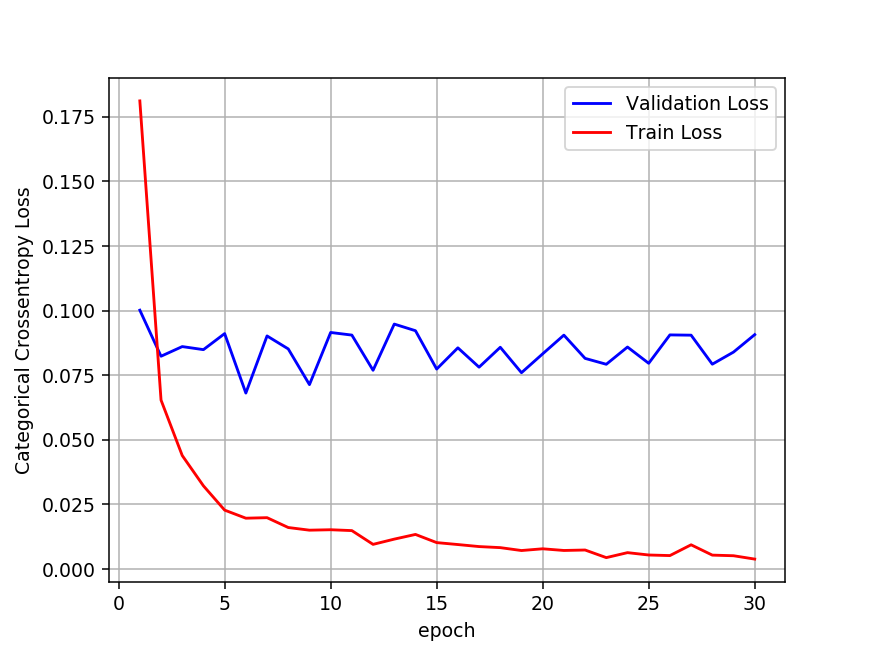

In [32]:
score_batch_2 = model_batch_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_batch_2[0]) 
print('Test accuracy:', score_batch_2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


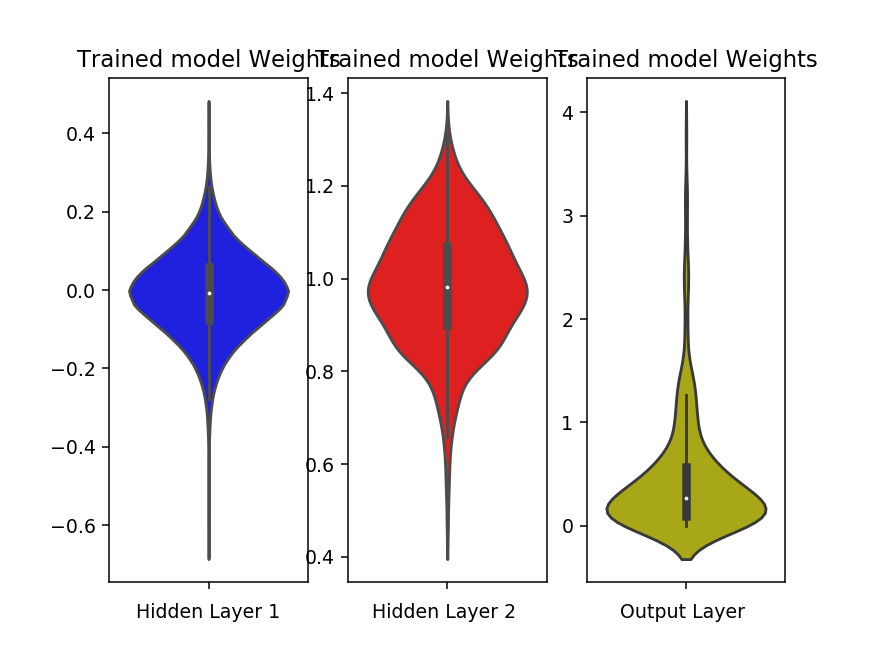

In [33]:
w_after = model_batch_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout + Relu + Adam 

In [34]:
model_drop_2 = Sequential()

model_drop_2.add(Dense(532, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.061, seed=None)))
model_drop_2.add(BatchNormalization())
model_drop_2.add(Dropout(0.5))

model_drop_2.add(Dense(384, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)) )
model_drop_2.add(BatchNormalization())
model_drop_2.add(Dropout(0.5))

model_drop_2.add(Dense(output_dim, activation='softmax'))


model_drop_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 532)               417620    
_________________________________________________________________
batch_normalization_9 (Batch (None, 532)               2128      
_________________________________________________________________
dropout_7 (Dropout)          (None, 532)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 384)               204672    
_________________________________________________________________
batch_normalization_10 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_8 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                3850      
Total para

In [35]:
model_drop_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 13s 215us/step - loss: 0.4029 - acc: 0.8781 - val_loss: 0.1331 - val_acc: 0.9583
Epoch 2/30
60000/60000 [==============================] - 11s 182us/step - loss: 0.1890 - acc: 0.9423 - val_loss: 0.0954 - val_acc: 0.9706
Epoch 3/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.1462 - acc: 0.9547 - val_loss: 0.0829 - val_acc: 0.9731
Epoch 4/30
60000/60000 [==============================] - 12s 194us/step - loss: 0.1256 - acc: 0.9605 - val_loss: 0.0772 - val_acc: 0.9757
Epoch 5/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.1101 - acc: 0.9656 - val_loss: 0.0702 - val_acc: 0.9787
Epoch 6/30
60000/60000 [==============================] - 11s 182us/step - loss: 0.0987 - acc: 0.9698 - val_loss: 0.0701 - val_acc: 0.9791
Epoch 7/30
60000/60000 [==============================] - 11s 184us/step - loss: 0.0910 - acc: 0.9712 - val_loss: 0.

Test score: 0.052775146638258594
Test accuracy: 0.9848


<IPython.core.display.Javascript object>


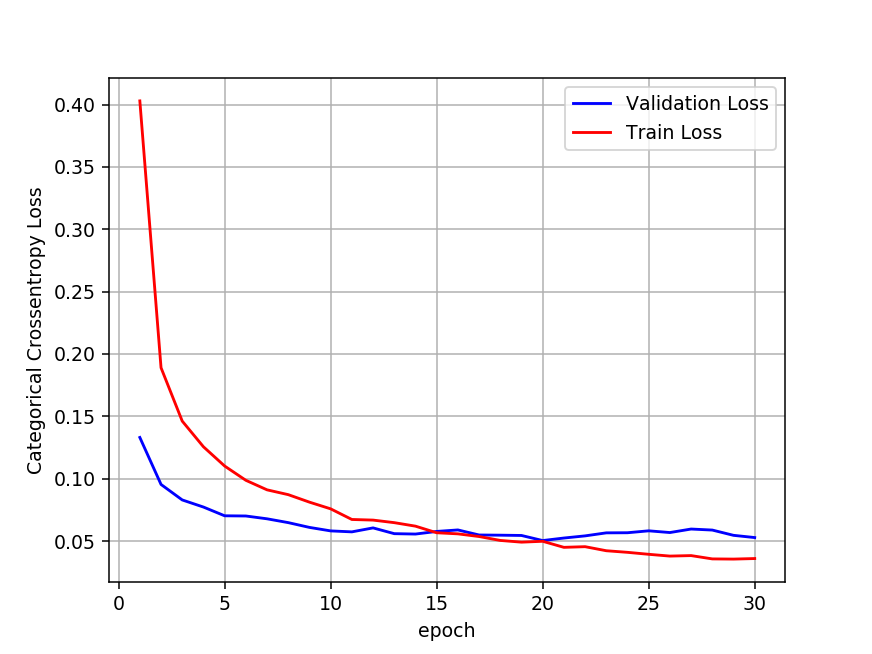

In [38]:
score_drop_2 = model_drop_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_drop_2[0]) 
print('Test accuracy:', score_drop_2[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


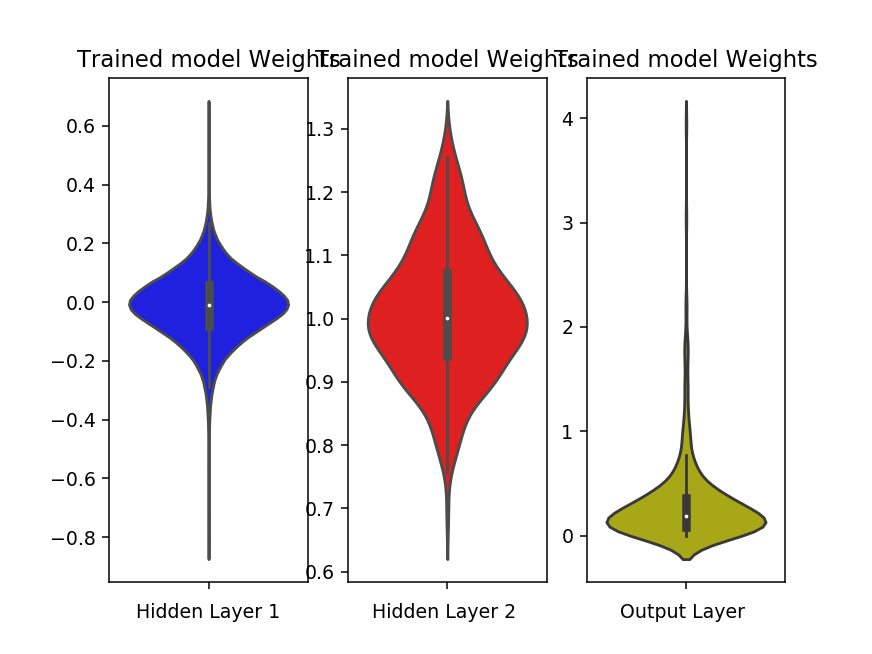

In [39]:
w_after = model_drop_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3 Layered Architecture 

### Relu + Adam 

In [40]:
# start building a model
model_relu_3 = Sequential()
model_relu_3.add(Dense(621, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))
model_relu_3.add(Dense(333, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.077, seed=None)) )
model_relu_3.add(Dense(161, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.111, seed=None)) )
model_relu_3.add(Dense(output_dim, activation='softmax'))

print(model_relu_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 621)               487485    
_________________________________________________________________
dense_20 (Dense)             (None, 333)               207126    
_________________________________________________________________
dense_21 (Dense)             (None, 161)               53774     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1620      
Total params: 750,005
Trainable params: 750,005
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
model_relu_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 188us/step - loss: 0.2033 - acc: 0.9383 - val_loss: 0.0901 - val_acc: 0.9723
Epoch 2/30
60000/60000 [==============================] - 11s 176us/step - loss: 0.0784 - acc: 0.9760 - val_loss: 0.0931 - val_acc: 0.9683
Epoch 3/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.0526 - acc: 0.9834 - val_loss: 0.0876 - val_acc: 0.9718
Epoch 4/30
60000/60000 [==============================] - 10s 162us/step - loss: 0.0381 - acc: 0.9877 - val_loss: 0.0757 - val_acc: 0.9782
Epoch 5/30
60000/60000 [==============================] - 10s 162us/step - loss: 0.0282 - acc: 0.9908 - val_loss: 0.0794 - val_acc: 0.9781
Epoch 6/30
60000/60000 [==============================] - 10s 162us/step - loss: 0.0255 - acc: 0.9922 - val_loss: 0.0896 - val_acc: 0.9774
Epoch 7/30
60000/60000 [==============================] - 10s 162us/step - loss: 0.0207 - acc: 0.9928 - val_loss: 0.

Test score: 0.09514001322890968
Test accuracy: 0.9816


<IPython.core.display.Javascript object>


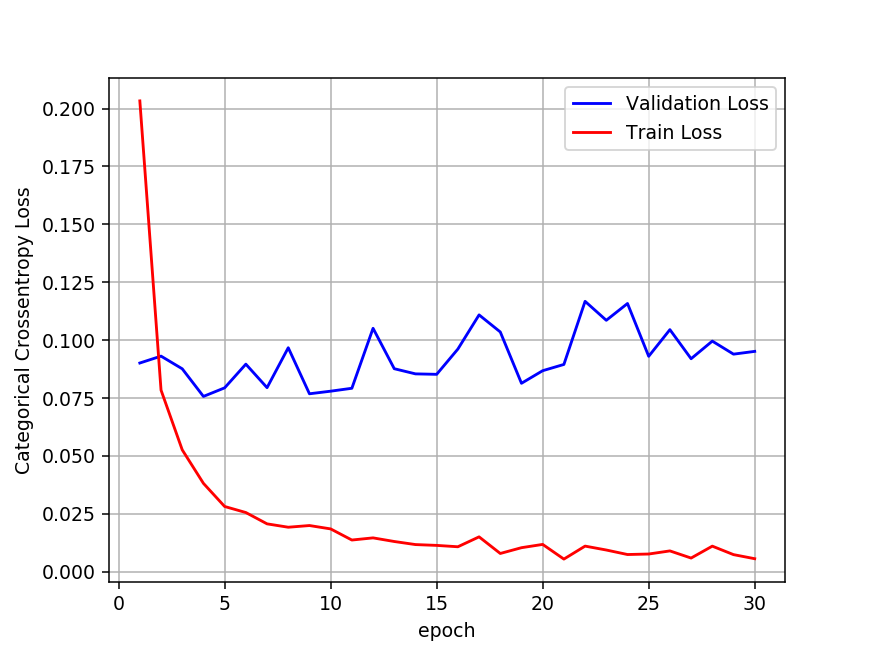

In [42]:
score_relu_3 = model_relu_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_3[0]) 
print('Test accuracy:', score_relu_3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


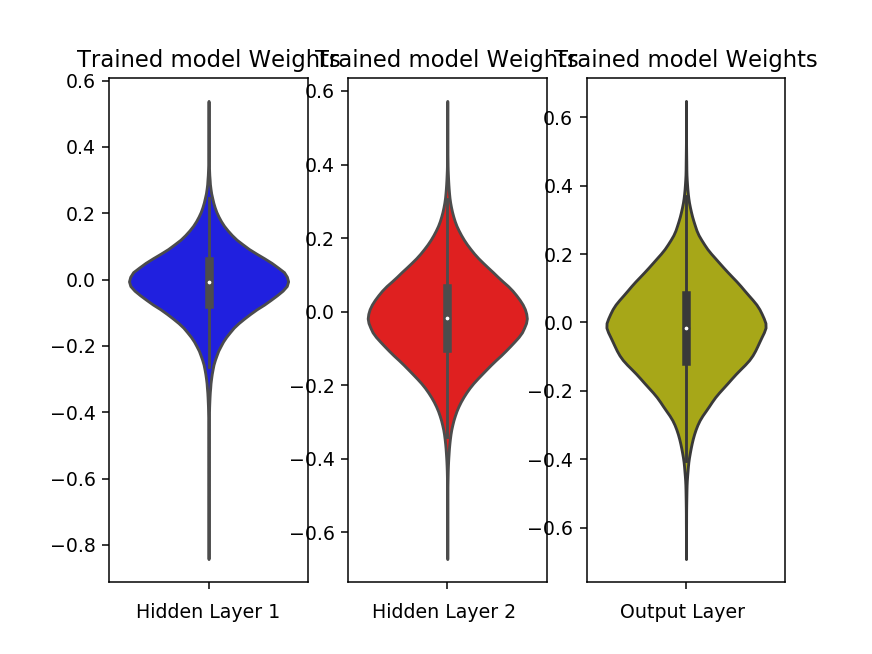

In [43]:
w_after = model_relu_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Batch normalization on hidden layer + Relu + Adam 

In [45]:
model_batch_3 = Sequential()

model_batch_3.add(Dense(589, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_batch_3.add(BatchNormalization())

model_batch_3.add(Dense(423, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.068, seed=None)) )
model_batch_3.add(BatchNormalization())

model_batch_3.add(Dense(272, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.085, seed=None)) )
model_batch_3.add(BatchNormalization())

model_batch_3.add(Dense(output_dim, activation='softmax'))


model_batch_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 589)               462365    
_________________________________________________________________
batch_normalization_14 (Batc (None, 589)               2356      
_________________________________________________________________
dense_28 (Dense)             (None, 423)               249570    
_________________________________________________________________
batch_normalization_15 (Batc (None, 423)               1692      
_________________________________________________________________
dense_29 (Dense)             (None, 272)               115328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 272)               1088      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2730      
Total para

In [46]:
model_batch_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 259us/step - loss: 0.1742 - acc: 0.9471 - val_loss: 0.0962 - val_acc: 0.9699
Epoch 2/30
60000/60000 [==============================] - 14s 232us/step - loss: 0.0643 - acc: 0.9801 - val_loss: 0.0826 - val_acc: 0.9744
Epoch 3/30
60000/60000 [==============================] - 13s 209us/step - loss: 0.0463 - acc: 0.9851 - val_loss: 0.0828 - val_acc: 0.9734
Epoch 4/30
60000/60000 [==============================] - 13s 212us/step - loss: 0.0340 - acc: 0.9891 - val_loss: 0.1240 - val_acc: 0.9660
Epoch 5/30
60000/60000 [==============================] - 12s 207us/step - loss: 0.0301 - acc: 0.9894 - val_loss: 0.0848 - val_acc: 0.9748
Epoch 6/30
60000/60000 [==============================] - 12s 207us/step - loss: 0.0232 - acc: 0.9922 - val_loss: 0.0811 - val_acc: 0.9769
Epoch 7/30
60000/60000 [==============================] - 14s 229us/step - loss: 0.0217 - acc: 0.9924 - val_loss: 0.

Test score: 0.08639855843480118
Test accuracy: 0.9817


<IPython.core.display.Javascript object>


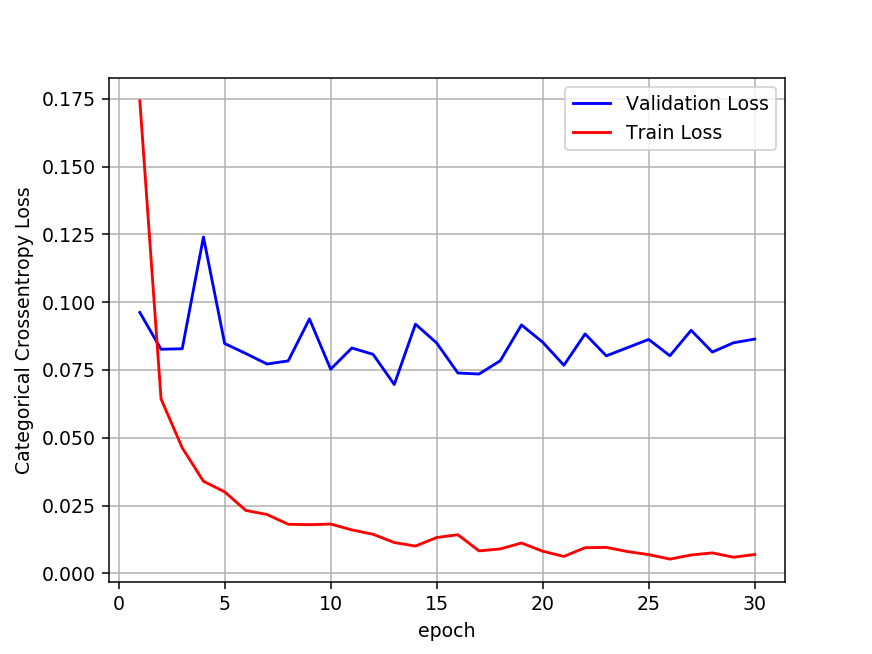

In [47]:
score_batch_3 = model_batch_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_batch_3[0]) 
print('Test accuracy:', score_batch_3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


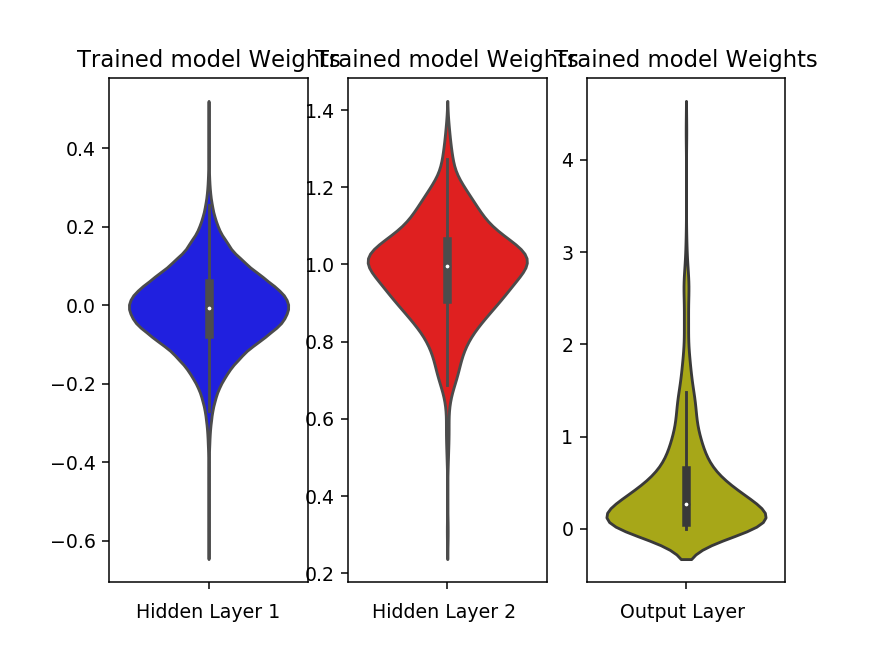

In [48]:
w_after = model_batch_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Drop + Relu + Adam 

In [49]:
model_drop_3 = Sequential()

model_drop_3.add(Dense(401, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.070, seed=None)))
model_drop_3.add(BatchNormalization())
model_drop_3.add(Dropout(0.5))

model_drop_3.add(Dense(219, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.095, seed=None)) )
model_drop_3.add(BatchNormalization())
model_drop_3.add(Dropout(0.5))

model_drop_3.add(Dense(121, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.128, seed=None)) )
model_drop_3.add(BatchNormalization())
model_drop_3.add(Dropout(0.5))

model_drop_3.add(Dense(output_dim, activation='softmax'))


model_drop_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 401)               314785    
_________________________________________________________________
batch_normalization_17 (Batc (None, 401)               1604      
_________________________________________________________________
dropout_9 (Dropout)          (None, 401)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 219)               88038     
_________________________________________________________________
batch_normalization_18 (Batc (None, 219)               876       
_________________________________________________________________
dropout_10 (Dropout)         (None, 219)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 121)               26620     
__________

In [50]:
model_drop_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 14s 227us/step - loss: 0.7051 - acc: 0.7825 - val_loss: 0.1937 - val_acc: 0.9398
Epoch 2/30
60000/60000 [==============================] - 11s 190us/step - loss: 0.2958 - acc: 0.9122 - val_loss: 0.1423 - val_acc: 0.9571
Epoch 3/30
60000/60000 [==============================] - 11s 180us/step - loss: 0.2296 - acc: 0.9335 - val_loss: 0.1228 - val_acc: 0.9622
Epoch 4/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.1852 - acc: 0.9450 - val_loss: 0.1040 - val_acc: 0.9688
Epoch 5/30
60000/60000 [==============================] - 11s 176us/step - loss: 0.1623 - acc: 0.9525 - val_loss: 0.0963 - val_acc: 0.9722
Epoch 6/30
60000/60000 [==============================] - 11s 183us/step - loss: 0.1507 - acc: 0.9566 - val_loss: 0.0854 - val_acc: 0.9741
Epoch 7/30
60000/60000 [==============================] - 11s 177us/step - loss: 0.1365 - acc: 0.9603 - val_loss: 0.

Test score: 0.05677158319847949
Test accuracy: 0.9858


<IPython.core.display.Javascript object>


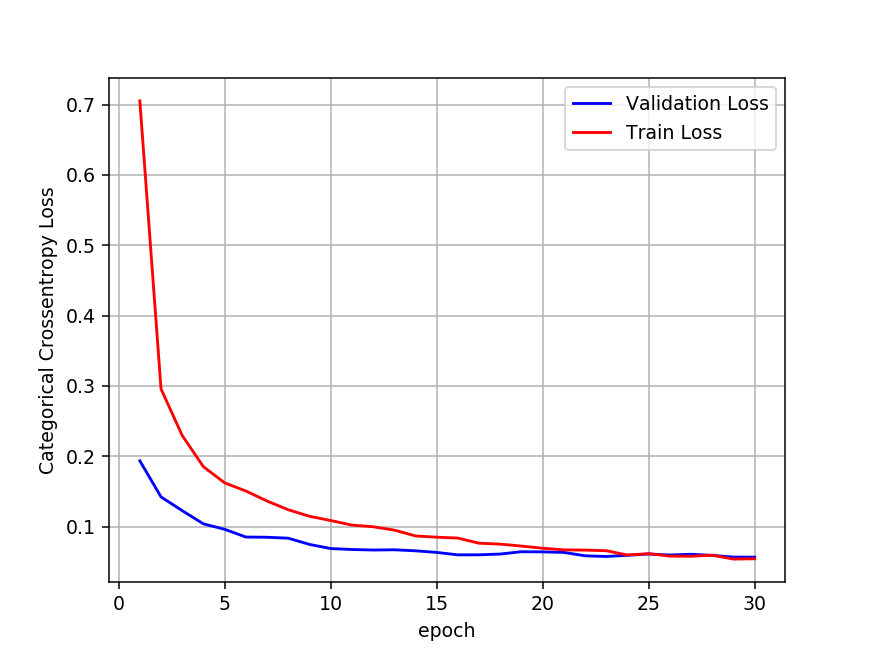

In [51]:
score_drop_3 = model_drop_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_drop_3[0]) 
print('Test accuracy:', score_drop_3[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


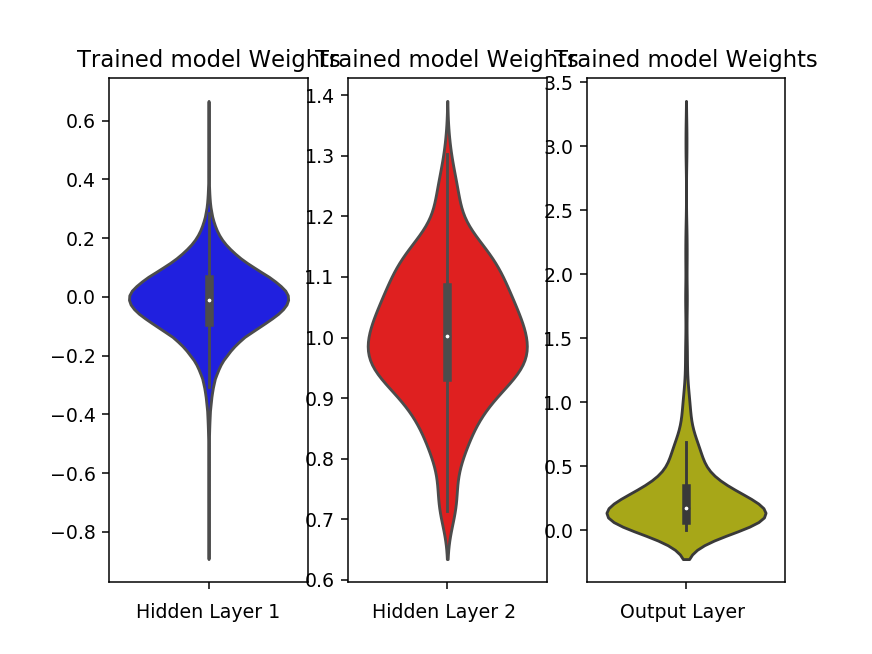

In [52]:
w_after = model_drop_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5 Layered Architecture

### Relu + Adam

In [53]:
# start building a model
model_relu_5 = Sequential()
model_relu_5.add(Dense(697, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.053, seed=None)))
model_relu_5.add(Dense(550, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.060, seed=None)) )
model_relu_5.add(Dense(462, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )
model_relu_5.add(Dense(322, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.078, seed=None)) )
model_relu_5.add(Dense(199, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.100, seed=None)) )
model_relu_5.add(Dense(output_dim, activation='softmax'))

print(model_relu_5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 697)               547145    
_________________________________________________________________
dense_36 (Dense)             (None, 550)               383900    
_________________________________________________________________
dense_37 (Dense)             (None, 462)               254562    
_________________________________________________________________
dense_38 (Dense)             (None, 322)               149086    
_________________________________________________________________
dense_39 (Dense)             (None, 199)               64277     
_________________________________________________________________
dense_40 (Dense)             (None, 10)                2000      
Total params: 1,400,970
Trainable params: 1,400,970
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_relu_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 20s 336us/step - loss: 0.2144 - acc: 0.9343 - val_loss: 0.1240 - val_acc: 0.9648
Epoch 2/30
60000/60000 [==============================] - 18s 302us/step - loss: 0.0875 - acc: 0.9726 - val_loss: 0.0997 - val_acc: 0.9691
Epoch 3/30
60000/60000 [==============================] - 18s 295us/step - loss: 0.0587 - acc: 0.9813 - val_loss: 0.0940 - val_acc: 0.9722
Epoch 4/30
60000/60000 [==============================] - 17s 288us/step - loss: 0.0467 - acc: 0.9851 - val_loss: 0.0828 - val_acc: 0.9745
Epoch 5/30
60000/60000 [==============================] - 19s 324us/step - loss: 0.0387 - acc: 0.9877 - val_loss: 0.1106 - val_acc: 0.9712
Epoch 6/30
60000/60000 [==============================] - 18s 300us/step - loss: 0.0337 - acc: 0.9900 - val_loss: 0.0836 - val_acc: 0.9748
Epoch 7/30
60000/60000 [==============================] - 18s 292us/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.

Test score: 0.09693762213855957
Test accuracy: 0.9801


<IPython.core.display.Javascript object>


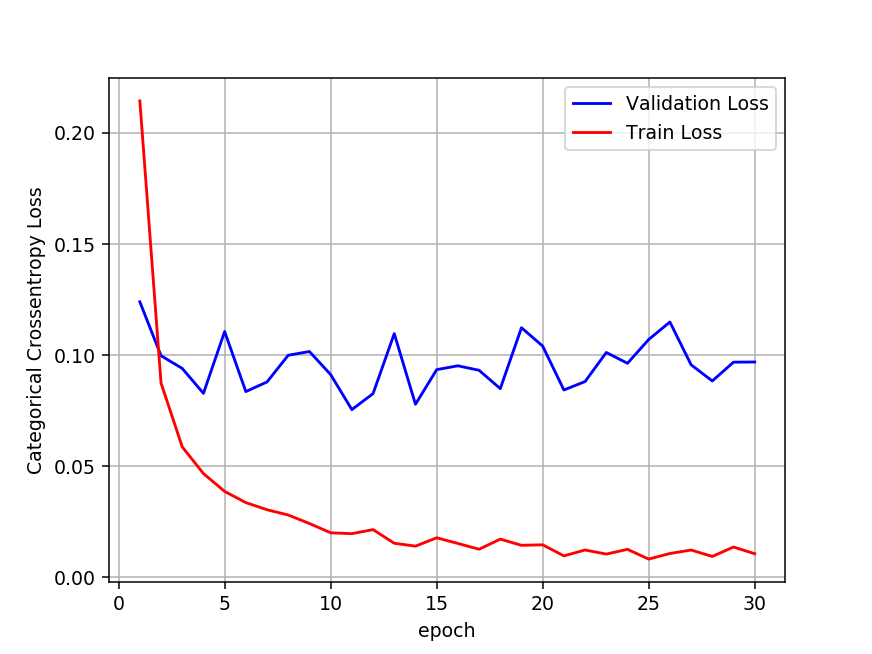

In [55]:
score_relu_5 = model_relu_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_relu_5[0]) 
print('Test accuracy:', score_relu_5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


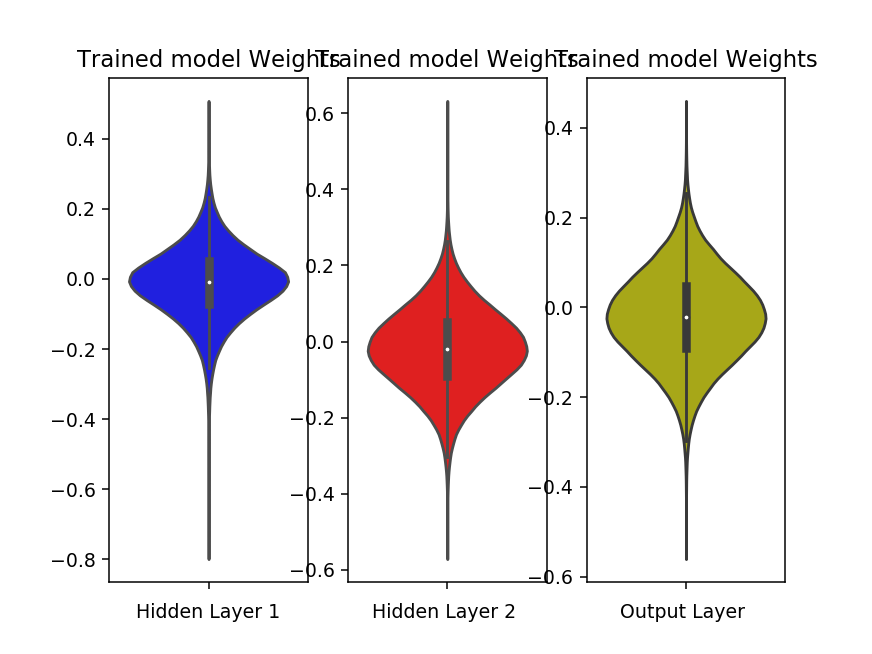

In [56]:
w_after = model_relu_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Batch Normalization on Hidden Layers + Relu + Adam 

In [57]:
model_batch_5 = Sequential()

model_batch_5.add(Dense(667, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))
model_batch_5.add(BatchNormalization())

model_batch_5.add(Dense(579, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )
model_batch_5.add(BatchNormalization())

model_batch_5.add(Dense(499, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.063, seed=None)) )
model_batch_5.add(BatchNormalization())

model_batch_5.add(Dense(349, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.075, seed=None)) )
model_batch_5.add(BatchNormalization())

model_batch_5.add(Dense(205, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.098, seed=None)) )
model_batch_5.add(BatchNormalization())

model_batch_5.add(Dense(output_dim, activation='softmax'))


model_batch_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 667)               523595    
_________________________________________________________________
batch_normalization_20 (Batc (None, 667)               2668      
_________________________________________________________________
dense_42 (Dense)             (None, 579)               386772    
_________________________________________________________________
batch_normalization_21 (Batc (None, 579)               2316      
_________________________________________________________________
dense_43 (Dense)             (None, 499)               289420    
_________________________________________________________________
batch_normalization_22 (Batc (None, 499)               1996      
_________________________________________________________________
dense_44 (Dense)             (None, 349)               174500    
__________

In [58]:
model_batch_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 28s 466us/step - loss: 0.1868 - acc: 0.9430 - val_loss: 0.1172 - val_acc: 0.9652
Epoch 2/30
60000/60000 [==============================] - 24s 401us/step - loss: 0.0786 - acc: 0.9756 - val_loss: 0.0948 - val_acc: 0.9700
Epoch 3/30
60000/60000 [==============================] - 25s 418us/step - loss: 0.0562 - acc: 0.9816 - val_loss: 0.0929 - val_acc: 0.9730
Epoch 4/30
60000/60000 [==============================] - 24s 401us/step - loss: 0.0463 - acc: 0.9853 - val_loss: 0.0935 - val_acc: 0.9725
Epoch 5/30
60000/60000 [==============================] - 26s 427us/step - loss: 0.0406 - acc: 0.9869 - val_loss: 0.0850 - val_acc: 0.9742
Epoch 6/30
60000/60000 [==============================] - 24s 402us/step - loss: 0.0339 - acc: 0.9886 - val_loss: 0.0818 - val_acc: 0.9769
Epoch 7/30
60000/60000 [==============================] - 24s 403us/step - loss: 0.0326 - acc: 0.9893 - val_loss: 0.

Test score: 0.06694545334176073
Test accuracy: 0.9851


<IPython.core.display.Javascript object>


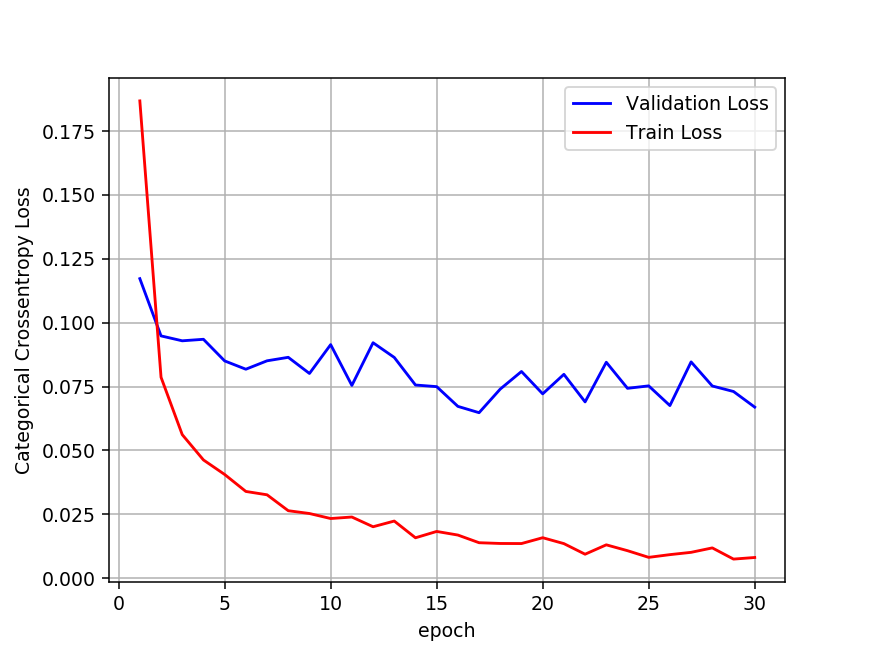

In [59]:
score_batch_5 = model_batch_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_batch_5[0]) 
print('Test accuracy:', score_batch_5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


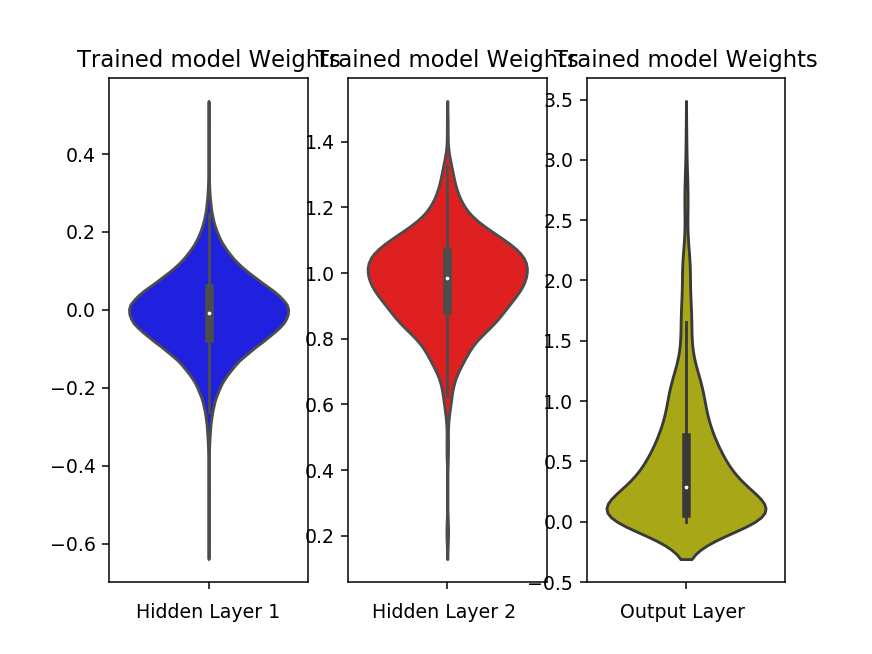

In [60]:
w_after = model_batch_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Dropout + Relu + Adam 

In [61]:
model_drop_5 = Sequential()

model_drop_5.add(Dense(609, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)))
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(599, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(410, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.069, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(232, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.092, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(144, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.117, seed=None)) )
model_drop_5.add(BatchNormalization())
model_drop_5.add(Dropout(0.5))

model_drop_5.add(Dense(output_dim, activation='softmax'))


model_drop_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 609)               478065    
_________________________________________________________________
batch_normalization_25 (Batc (None, 609)               2436      
_________________________________________________________________
dropout_12 (Dropout)         (None, 609)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 599)               365390    
_________________________________________________________________
batch_normalization_26 (Batc (None, 599)               2396      
_________________________________________________________________
dropout_13 (Dropout)         (None, 599)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 410)               246000    
__________

In [62]:
model_drop_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 29s 475us/step - loss: 0.9197 - acc: 0.7174 - val_loss: 0.2094 - val_acc: 0.9404
Epoch 2/30
60000/60000 [==============================] - 25s 423us/step - loss: 0.3119 - acc: 0.9107 - val_loss: 0.1432 - val_acc: 0.9593
Epoch 3/30
60000/60000 [==============================] - 24s 398us/step - loss: 0.2406 - acc: 0.9318 - val_loss: 0.1227 - val_acc: 0.9645
Epoch 4/30
60000/60000 [==============================] - 24s 400us/step - loss: 0.1976 - acc: 0.9450 - val_loss: 0.1176 - val_acc: 0.9667
Epoch 5/30
60000/60000 [==============================] - 25s 417us/step - loss: 0.1734 - acc: 0.9512 - val_loss: 0.0926 - val_acc: 0.9736
Epoch 6/30
60000/60000 [==============================] - 24s 402us/step - loss: 0.1540 - acc: 0.9561 - val_loss: 0.0907 - val_acc: 0.9744
Epoch 7/30
60000/60000 [==============================] - 25s 414us/step - loss: 0.1399 - acc: 0.9607 - val_loss: 0.

Test score: 0.056678825084562415
Test accuracy: 0.9855


<IPython.core.display.Javascript object>


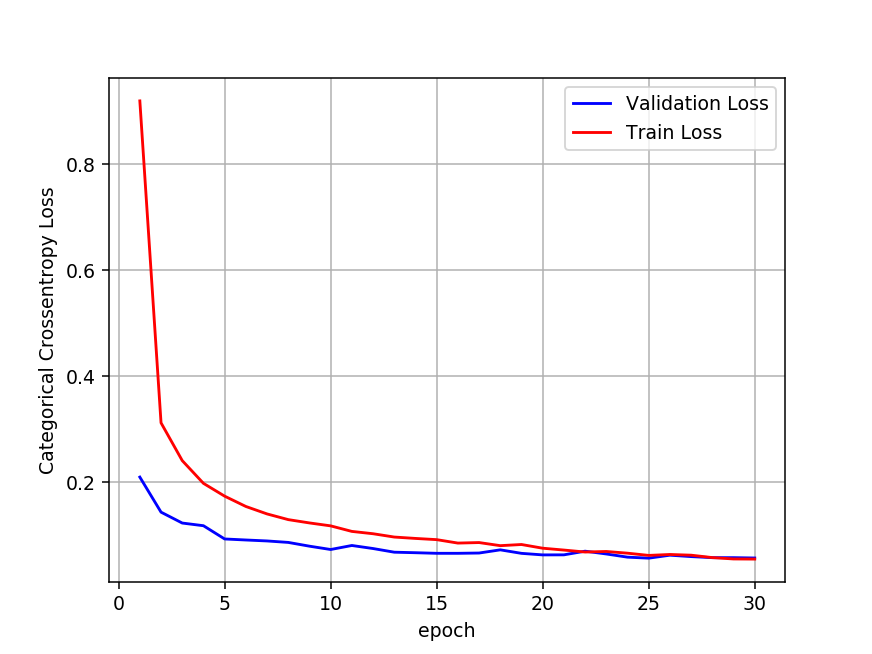

In [63]:
score_drop_5 = model_drop_5.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score_drop_5[0]) 
print('Test accuracy:', score_drop_5[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


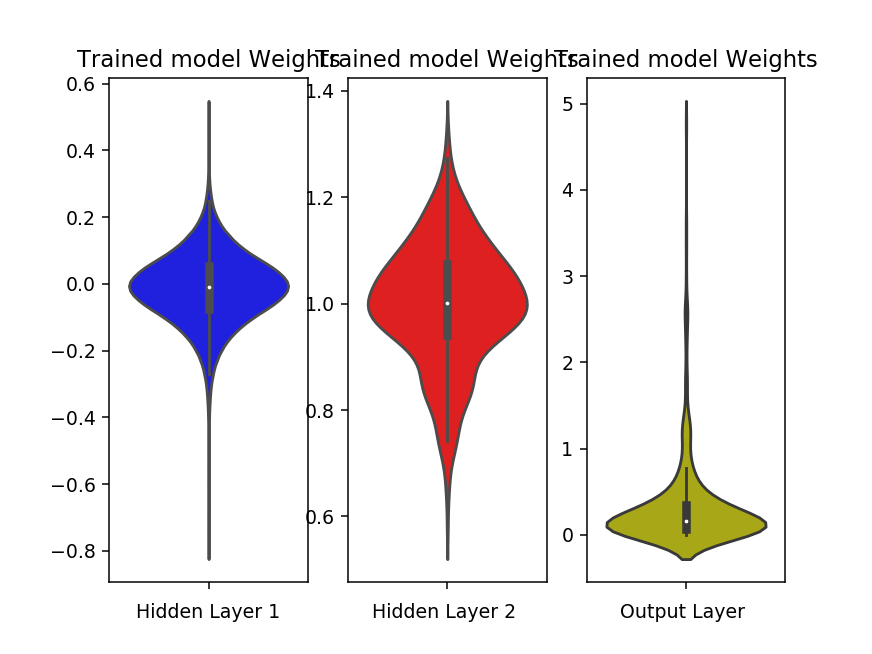

In [64]:
w_after = model_drop_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### Prettytable

In [74]:
number= [1,2,3,4,5,6,7,8,9]  
name= ["Relu layer 2","Relu layer 3","Relu layer 5"," Batch layer 2"," Batch layer 3"," Batch layer 5","Drop layer 2","Drop layer 3","Drop layer 5"] 
score= [score_relu_2[0],score_relu_3[0],score_relu_5[0],score_batch_2[0],score_batch_3[0],score_batch_5[0],score_drop_2[0],score_drop_3[0],score_drop_5[0]] 
acc= [score_relu_2[1],score_relu_3[1],score_relu_5[1],score_batch_2[1],score_batch_3[1],score_batch_5[1],score_drop_2[1],score_drop_3[1],score_drop_5[1]] 
      
#Initialize Prettytable 
ptable = PrettyTable() 
ptable.add_column("Index", number) 
ptable.add_column("Architecture", name)
ptable.add_column("Test Score", score)  
ptable.add_column("Test Accuracy", acc) 

print(ptable)

+-------+----------------+----------------------+---------------+
| Index |  Architecture  |      Test Score      | Test Accuracy |
+-------+----------------+----------------------+---------------+
|   1   |  Relu layer 2  | 0.09564156731741441  |     0.9817    |
|   2   |  Relu layer 3  | 0.09514001322890968  |     0.9816    |
|   3   |  Relu layer 5  | 0.09693762213855957  |     0.9801    |
|   4   |  Batch layer 2 | 0.09071999986333348  |     0.9804    |
|   5   |  Batch layer 3 | 0.08639855843480118  |     0.9817    |
|   6   |  Batch layer 5 | 0.06694545334176073  |     0.9851    |
|   7   |  Drop layer 2  | 0.052775146638258594 |     0.9848    |
|   8   |  Drop layer 3  | 0.05677158319847949  |     0.9858    |
|   9   |  Drop layer 5  | 0.056678825084562415 |     0.9855    |
+-------+----------------+----------------------+---------------+


### Conclusions 

1. We implement Keras on MNIST dataset.
2. Different layered architectures like 2, 3, 5 hidden layers are used to build Neural networks.
3. Activation method RELU is used and for optimization ADAM is used.
4. In each layered network, Batch normalization and dropout layer is also added to check the performance of model.
5. Test accuracy is same for all architectures.
6. Test score is same in case of Relu, in case of dropout test score is low than Relu.